<a href="https://colab.research.google.com/github/AayushTalekar/SM2/blob/master/CW/J054_PCA_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical
from keras import models
from keras import layers
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits

In [2]:
train = pd.read_csv('/content/mnist_train.csv')
test = pd.read_csv('/content/mnist_test.csv')

In [3]:
train.shape

(60000, 785)

In [4]:
test.shape

(10000, 785)

In [5]:
train['label'].value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64

In [6]:
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
fac = 1/255.0
train_imgs = train.drop('label', axis=1)*fac
test_imgs = test.drop('label', axis=1)*fac

train_labels = train['label']
test_labels = test['label']

In [9]:
train_imgs = np.array(train_imgs)

In [10]:
test_imgs = np.array(test_imgs)

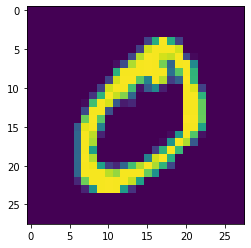

In [11]:
plt.imshow(train_imgs[1].reshape((28,28)))

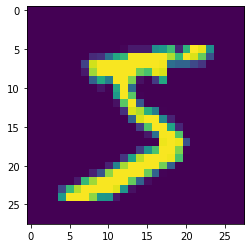

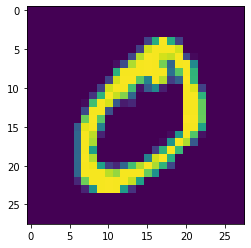

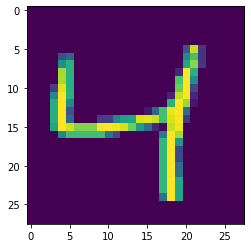

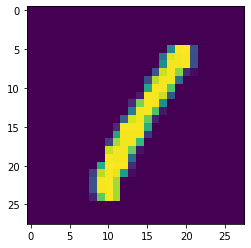

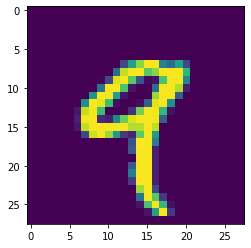

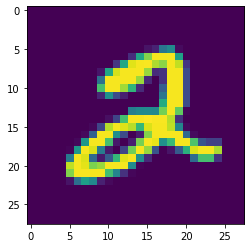

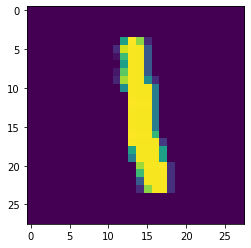

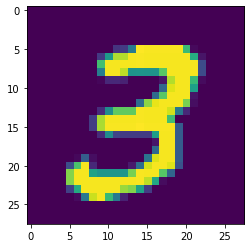

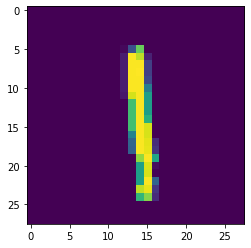

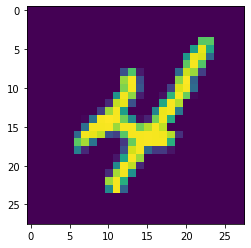

In [12]:
for i in range(10):
    img = train_imgs[i].reshape((28,28))
    plt.imshow(img)
    plt.show()

#Logistic without PCA

In [13]:
lr = LogisticRegression()
lr.fit(train_imgs, train_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
y_pred = lr.predict(test_imgs)
print(y_pred)

[7 2 1 ... 4 5 6]


In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, y_pred)

0.9258

#LDA without PCA

In [16]:
lda=LinearDiscriminantAnalysis()
lda.fit(train_imgs,train_labels)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [17]:
pred=lda.predict(test_imgs)
accuracy=accuracy_score(pred,test_labels)
print(accuracy)

0.873


#Neural Network without PCA

In [18]:
train_imgs.shape

(60000, 784)

In [19]:
train_labels_nn = to_categorical(train_labels)
test_labels_nn = to_categorical(test_labels) 

In [20]:
nn = models.Sequential()
nn.add(layers.Dense(1024,activation="relu",input_shape=(784,)))
nn.add(layers.Dense(512,activation="relu"))
nn.add(layers.Dense(256,activation="relu"))
nn.add(layers.Dense(128,activation="relu"))
nn.add(layers.Dense(64,activation="relu"))
nn.add(layers.Dense(32,activation="relu"))
nn.add(layers.Dense(10,activation="softmax"))

In [21]:
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              803840    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                3

In [22]:
nn.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
nn.fit(train_imgs,train_labels_nn,batch_size=1000,epochs=64)

Epoch 1/64
60/60 [==============================] - 0s 8ms/step - loss: 0.8810 - accuracy: 0.7145
Epoch 2/64
60/60 [==============================] - 0s 6ms/step - loss: 0.2406 - accuracy: 0.9280
Epoch 3/64
60/60 [==============================] - 0s 5ms/step - loss: 0.1480 - accuracy: 0.9564
Epoch 4/64
60/60 [==============================] - 0s 6ms/step - loss: 0.0951 - accuracy: 0.9721
Epoch 5/64
60/60 [==============================] - 0s 6ms/step - loss: 0.0799 - accuracy: 0.9768
Epoch 6/64
60/60 [==============================] - 0s 5ms/step - loss: 0.0615 - accuracy: 0.9822
Epoch 7/64
60/60 [==============================] - 0s 6ms/step - loss: 0.0426 - accuracy: 0.9876
Epoch 8/64
60/60 [==============================] - 0s 5ms/step - loss: 0.0347 - accuracy: 0.9900
Epoch 9/64
60/60 [==============================] - 0s 5ms/step - loss: 0.0331 - accuracy: 0.9905
Epoch 10/64
60/60 [==============================] - 0s 6ms/step - loss: 0.0216 - accuracy: 0.9935
Epoch 11/64
60/60 [

In [24]:
nn.evaluate(test_imgs, test_labels_nn)[1]

313/313 [==============================] - 1s 2ms/step - loss: 0.1558 - accuracy: 0.9831


0.9830999970436096

#PCA

In [25]:
pca1 = PCA()

In [26]:
pca1.fit(train_imgs)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [29]:
np.sum(pca1.explained_variance_ratio_[:120])

0.9311516329574504

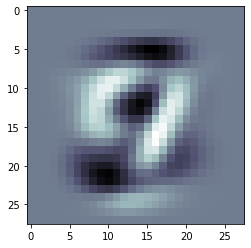

In [30]:
plt.imshow(pca1.components_[1].reshape(28,28),cmap=plt.cm.bone)

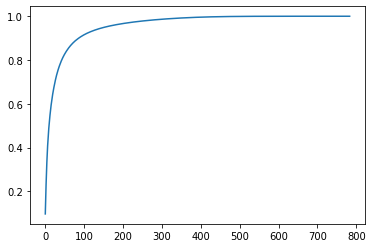

In [31]:
plt.plot(np.cumsum(pca1.explained_variance_ratio_))

In [32]:
pca2 = PCA(120)

In [33]:
pca2.fit(train_imgs)

PCA(copy=True, iterated_power='auto', n_components=120, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [34]:
print(pca2.components_.shape)

(120, 784)


Taking pca 2 ie 120 components

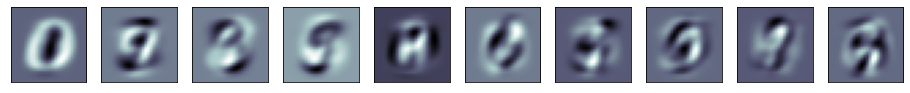

In [35]:
fig = plt.figure(figsize=(16, 6)) # Plotting using 120 components
for i in range(10):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca2.components_[i].reshape(28,28),
              cmap=plt.cm.bone)

In [36]:
train_pca = pca2.transform(train_imgs) ## Omega 
train_pca.shape
test_pca = pca2.transform(test_imgs)

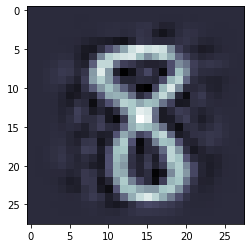

In [38]:
inv_proj = pca2.inverse_transform(train_pca)
plt.imshow(inv_proj[144].reshape(28,28),cmap=plt.cm.bone)

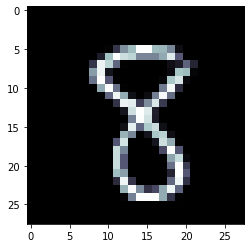

In [39]:
plt.imshow(train_imgs[144].reshape(28,28),cmap=plt.cm.bone)

#Logistic with PCA

In [175]:
train_lr = pca3.transform(train_imgs) #Omega for train data
test_lr = pca3.transform(test_imgs)#Omega for test Data
print(train_lr.shape,test_lr.shape)

(60000, 100) (10000, 100)


In [176]:
logisticregression = LogisticRegression()
logisticregression.fit(train_lr, train_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [177]:
y_pred = logisticregression.predict(test_lr)
print(y_pred)

[7 2 1 ... 4 5 6]


In [178]:
accuracy_score(test_labels, y_pred)

0.9203

#LDA with PCA

In [179]:
lda=LinearDiscriminantAnalysis()
lda.fit(train_lr,train_labels)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [180]:
pred=lda.predict(test_lr)
accuracy=accuracy_score(pred,test_labels)
print(accuracy)

0.8759


#Neural Network with PCA

In [45]:
train_pca.shape

(60000, 120)

In [40]:
train_labels_nn = to_categorical(train_labels)
test_labels_nn = to_categorical(test_labels) 

In [46]:
nn = models.Sequential()
nn.add(layers.Dense(1024,activation="relu",input_shape=(120,)))
nn.add(layers.Dense(512,activation="relu"))
nn.add(layers.Dense(256,activation="relu"))
nn.add(layers.Dense(10,activation="softmax"))

In [47]:
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1024)              123904    
_________________________________________________________________
dense_12 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_14 (Dense)             (None, 10)                2570      
Total params: 782,602
Trainable params: 782,602
Non-trainable params: 0
_________________________________________________________________


In [48]:
nn.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [49]:
nn.fit(train_pca, train_labels_nn, batch_size=100, epochs=50)

Epoch 1/50
600/600 [==============================] - 2s 3ms/step - loss: 0.1839 - accuracy: 0.9436
Epoch 2/50
600/600 [==============================] - 2s 3ms/step - loss: 0.0722 - accuracy: 0.9782
Epoch 3/50
600/600 [==============================] - 2s 3ms/step - loss: 0.0459 - accuracy: 0.9858
Epoch 4/50
600/600 [==============================] - 2s 3ms/step - loss: 0.0333 - accuracy: 0.9903
Epoch 5/50
600/600 [==============================] - 2s 3ms/step - loss: 0.0256 - accuracy: 0.9921
Epoch 6/50
600/600 [==============================] - 2s 3ms/step - loss: 0.0208 - accuracy: 0.9939
Epoch 7/50
600/600 [==============================] - 2s 3ms/step - loss: 0.0195 - accuracy: 0.9945
Epoch 8/50
600/600 [==============================] - 2s 3ms/step - loss: 0.0155 - accuracy: 0.9956
Epoch 9/50
600/600 [==============================] - 2s 3ms/step - loss: 0.0140 - accuracy: 0.9964
Epoch 10/50
600/600 [==============================] - 2s 3ms/step - loss: 0.0121 - accuracy: 0.9967

In [51]:
nn.evaluate(test_pca, test_labels_nn)[1]

313/313 [==============================] - 1s 2ms/step - loss: 0.4273 - accuracy: 0.9831


0.9830999970436096